In [62]:
# df
import pandas as pd

# formula anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# plots
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

Данные взяты из бесплатного курса "Основы статистики" на платформе Stepik. В них представлена информация по исследованию влияния инъекции некоторого гормона на показатель концентрации кальция в плазме крови у птиц с учетом их пола.


**Цель** - оценить имеется ли влияние пола и наличия инъекции на показатель кальция

Изначально известно:
* Данные количесвенные
* Независимые
* Данные изъяты из г.с. с нормальным распределение
* Дисперсии гомогенны
* Выборки равны по объему



Близости средних будет  оцениваться с помощью *многофакторного дисперсионного анализа* 

# 1. Загрузка и предобработка данных


In [63]:
# Data loading
url = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
birds_data = pd.read_csv(url)
birds_data.head()

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1


In [64]:
# alpha
alpha = 0.05

In [65]:
# Check NA
birds_data.isna().sum()

var4       0
hormone    0
sex        0
dtype: int64

In [66]:
# Basic metrics
birds_data.groupby(['hormone', 'sex']).describe()

var4                                                        \
            count       mean       std        min        25%        50%   
hormone sex                                                               
0       0    16.0  19.887291  3.677211  13.947889  17.474799  19.244836   
        1    16.0  17.608916  2.449753  13.140259  15.333087  17.929291   
1       0    16.0  17.292254  2.864428  12.452679  14.917269  17.415496   
        1    16.0  19.743662  3.383574  14.574463  17.799358  19.691275   

                                   
                   75%        max  
hormone sex                        
0       0    21.026331  28.619523  
        1    19.517146  20.688260  
1       0    18.750598  22.300875  
        1    21.875595  25.152882

# 2. n-way ANOVA


H0: средние значения выборок равны

α = 0.05

In [67]:
# N-way ANOVA
formula = 'var4 ~ hormone + sex + hormone:sex'
model = ols(formula, birds_data).fit()
aov_table = anova_lm(model, type=2)
print(aov_table)

               df      sum_sq    mean_sq         F    PR(>F)
hormone       1.0    0.847472   0.847472  0.086528  0.769653
sex           1.0    0.119762   0.119762  0.012228  0.912318
hormone:sex   1.0   89.483384  89.483384  9.136390  0.003682
Residual     60.0  587.650394   9.794173       NaN       NaN


По p-значению можно сделать вывод, что в отдельности факторы не оказывают значимого влияния на уровень кальция в крови. Но их взаимодействие оказывает влияние.


# 3. Оценим результаты по графику доверительных интервалов


In [68]:
# Chart settings
sns.set(style='whitegrid',
        font_scale=1.2,
        rc = {'figure.figsize': (14,8)})

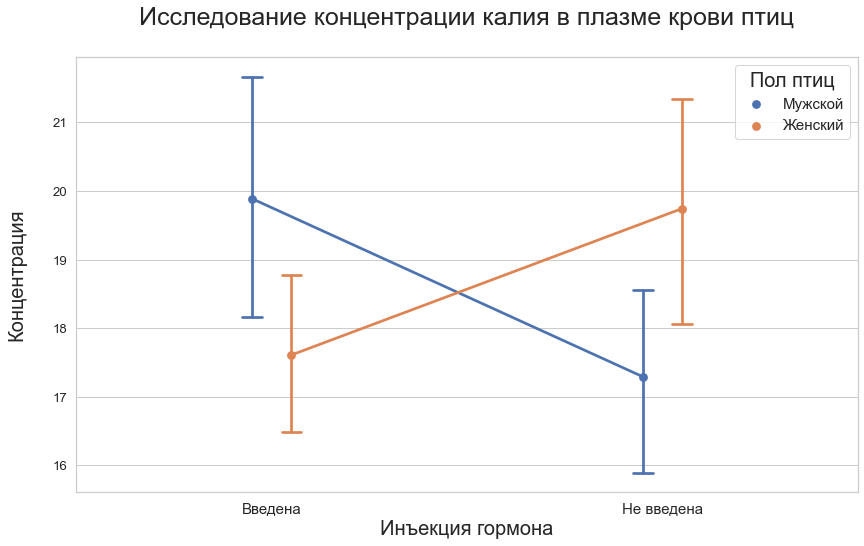

In [69]:
# Сonfidence interval plot
pplot =  sns.pointplot(data=birds_data, x='hormone', y='var4', hue='sex',dodge=0.1, capsize=0.05)

# Settings
pplot.set_title('Исследование концентрации калия в плазме крови птиц\n', fontsize=25)
pplot.set_xlabel('Инъекция гормона', fontsize=20)
pplot.set_ylabel('Концентрация\n', fontsize=20)

pplot.set_xticklabels(labels=['Введена', 'Не введена'], fontsize=15)

handles = pplot.get_legend_handles_labels()[0]
pplot.legend(handles=handles, 
             labels=['Мужской', 'Женский'], 
             title='Пол птиц', 
             title_fontsize=20, 
             fontsize=15)

По графику видно, что факт инъекции по разному влияет на уровень концетрации кальция в крови в зависимости от пола птиц. Это еще раз подтвержает вывод о значимостьи влияния совокупности этих факторов


# 4. Вывод

Факторы отдельно друг от друга не оказывают значимого влияния на уровень концетрации калия. Но их взаимодействие статистически значимо.